(2160, 3840, 3)


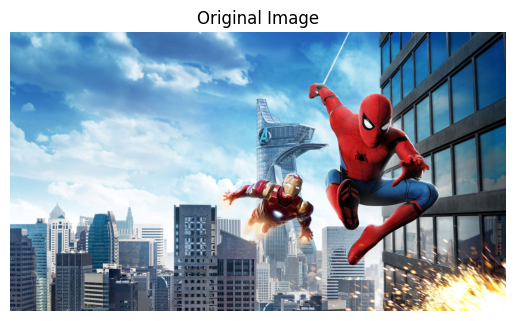

In [7]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

image_raw = imread("spiderman.jpg")
print(image_raw.shape)
plt.imshow(image_raw)
plt.axis('off')
plt.title('Original Image')
plt.show()

In [8]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

(2160, 3840)


1.0


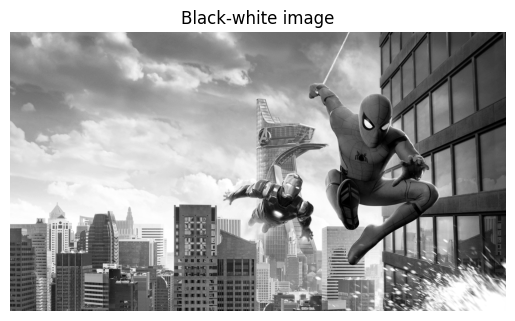

In [13]:
def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
image_bw = image_sum/image_sum.max()
print(image_bw.max())
display_image(image_bw, 'Black-white image')

Cumulative_variance [0.40588784 0.50960108 0.59266384 ... 1.         1.         1.        ]
Number of components required to cover 95% of the variance: 66


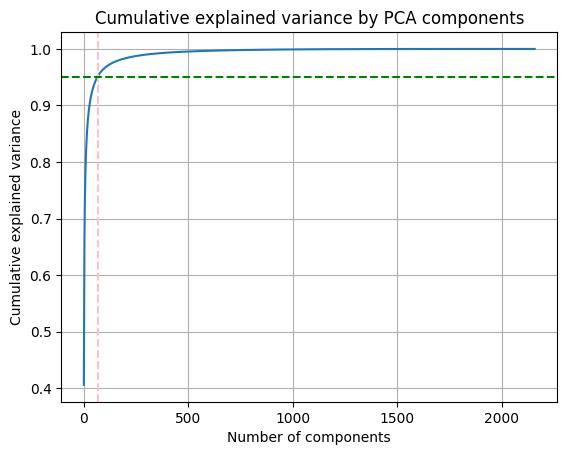

In [11]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

image_raw = imread("spiderman.jpg")
image_sum = image_raw.sum(axis=2)
image_bw = image_sum/image_sum.max()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaled_image_bw = scaler.fit_transform(image_bw)

pca = PCA()
pca.fit(scaled_image_bw)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(f"Cumulative_variance {cumulative_variance}")
plt.plot(cumulative_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance by PCA components')
plt.grid(True)

num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components required to cover 95% of the variance: {num_components}')

plt.axvline(x=num_components, color='pink', linestyle='--')
plt.axhline(y=0.95, color='g', linestyle='--')
plt.show()

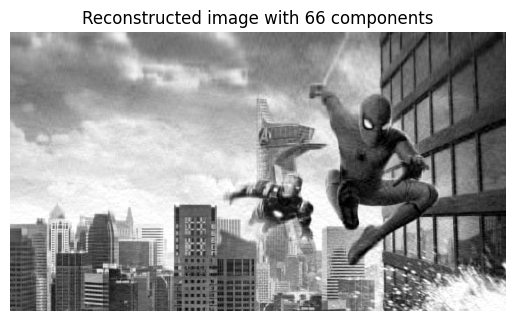

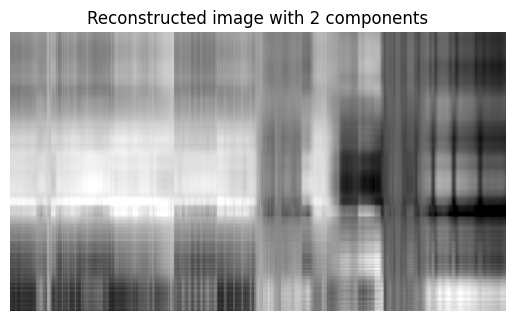

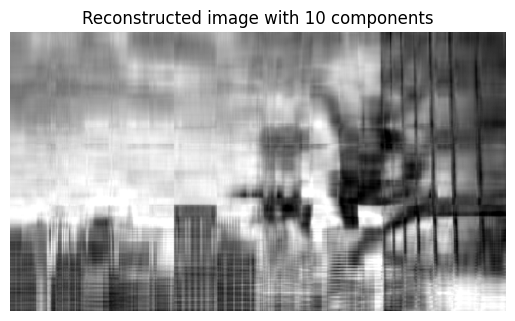

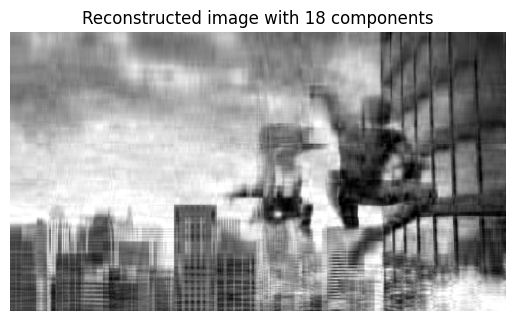

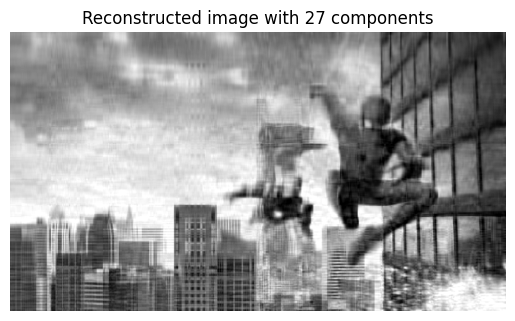

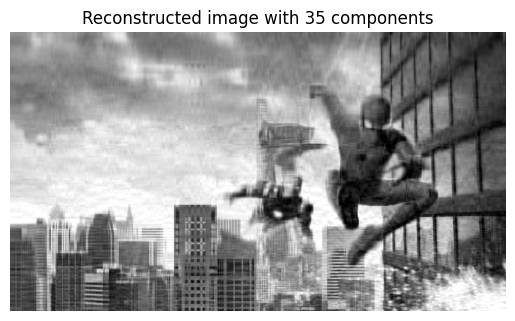

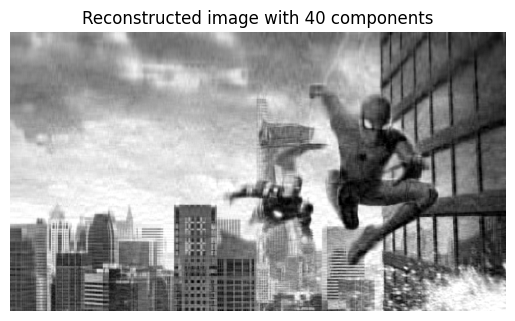

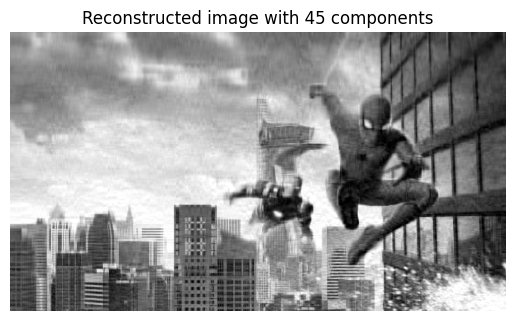

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
def reconstruct_and_display_image(num_components):
    pca_limited = PCA(n_components=num_components)
    scaled_image_bw_pca = pca_limited.fit_transform(scaled_image_bw)
    image_reconstructed = pca_limited.inverse_transform(scaled_image_bw_pca)
    image_reconstructed_unscaled = scaler.inverse_transform(image_reconstructed)
    image_reconstructed_clipped = np.clip(image_reconstructed_unscaled, 0, 1)
    display_image(image_reconstructed_clipped, f'Reconstructed image with {num_components} components')

reconstruct_and_display_image(num_components)
reconstruct_and_display_image(2)
reconstruct_and_display_image(10)
reconstruct_and_display_image(18)
reconstruct_and_display_image(27)
reconstruct_and_display_image(35)
reconstruct_and_display_image(40)
reconstruct_and_display_image(45)
reconstruct_and_display_image(57)
reconstruct_and_display_image(63)